In [1]:
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the first digit of a number
def first_digit(num):
    # if the value is na, return
    if pd.isna(num):
        return
    # if the value is a string (such as null or n.def), return
    d = str(num)[0]
    if not (d.isdigit()):
        return
    # the first digit should never be a 0, so if it is, return
    if num == 0:
        return
    # otherwise, return the first digit
    else:
        num = abs(float(num) * 10000000)
        return(int(str(num)[0]))

In [2]:
# 'Data/30814501.csv', - has only 2-3
# 'Data/31131048.csv', - very weird
data_files = ['Data/29718670_S10.csv', 'Data/34783559.csv']

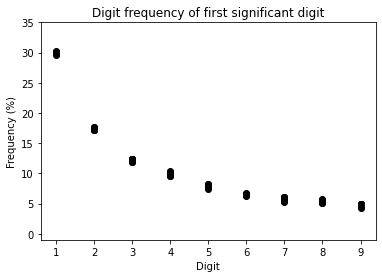

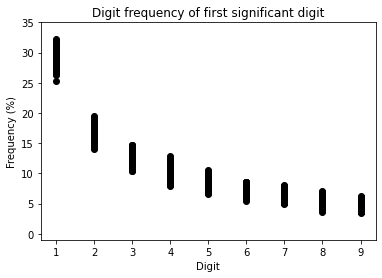

In [3]:
char = 'A'
for file in data_files:
    # read in the file and set up dictionaries to hold the digits and digit frequencies
    data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
    first_digit_dict = {}
    first_digit_freq = {}

    # iterate through all the columns in the file
    for column in data:
        # grab the numbers in the columns
        nums = data[column]
        # for each number in the column, store the last digit
        first_dig = [first_digit(num) for num in nums]
        # store the last digits of each column in a dictionary
        first_digit_dict[column] = first_dig

    # create a variable to hold the percentages of each digit in each column
    column_data = {}

    # iterate through each column
    for key in first_digit_dict.keys():
        # get the frequencies for each digit in the column
        frequencies = get_frequencies(first_digit_dict[key])
        # calculate the percentage
        frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
        # store the percentages
        first_digit_freq[key] = frequencies

        # put the percentages in the dictionary
        column_data[key] = frequencies['Percentage']

    # put the data in a dataframe
    frequency_data = pd.DataFrame(column_data)
    
    # since the first digit should never be a 0 and we made sure it wasn't, drop the 0 row
    frequency_data = frequency_data.drop([0])
    
#     print(frequency_data)
    # transpose the dataframe to combine frequencies into 1 column
    frequency_data_transposed = pd.DataFrame(frequency_data).T.stack().reset_index()
    # rename the columns
    frequency_data_transposed = frequency_data_transposed.rename(columns={0: "percentage", "level_1": "Digit"})
    
    # plot the data
    plt.scatter(x = 'Digit', y = 'percentage', data = frequency_data_transposed, color = 'k')
    plt.xticks([1,2,3,4,5,6,7,8,9])
    plt.ylim(-1, 35)
    plt.ylabel("Frequency (%)")
    plt.xlabel("Digit")
    plt.title("Digit frequency of first significant digit")
#     plt.savefig(f"Figures/Figure2_{char}", dpi=300)
    plt.show()
    i = ord(char)
    i += 1
    char = chr(i)